In [19]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_excel('PredictorData2018.xlsx')

In [4]:
df.tail()

,yyyymm,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
1771,201808,2901.52,52.338996,130.39,0.229618,0.0203,0.0388,0.0477,0.0293,-0.021495,0.001692,0.000556,0.0152,0.0058,0.000471,NaN,0.032938,0.030647
1772,201809,2913.98,52.338996,130.39,0.225335,0.0213,0.0398,0.0488,0.0334,-0.020871,0.001775,0.001162,-0.0518,-0.0120,0.000230,NaN,0.005138,0.003758
1773,201810,2711.74,53.748178,132.39,0.237380,0.0225,0.0414,0.0507,0.0352,-0.021222,0.001875,0.001767,-0.0204,-0.0323,0.004578,NaN,-0.068409,-0.069492
1774,201811,2760.17,53.748178,132.39,0.233451,0.0233,0.0422,0.0522,0.0317,-0.024593,0.001942,-0.003349,0.0505,0.0071,0.002838,NaN,0.019980,0.017477
1775,201812,2506.85,53.748178,132.39,0.255578,0.0237,0.0402,0.0513,0.0284,-0.019217,0.001975,-0.003194,0.0481,0.0370,0.006793,NaN,-0.090928,-0.092457


In [51]:
X = df['D12'].pct_change(12).dropna()

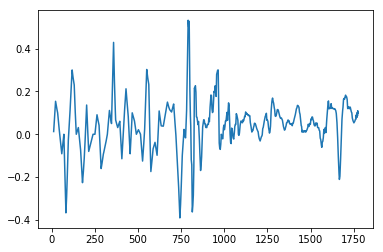

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
X.plot()

In [53]:
import skedm as edm

E = edm.Embed(X) #initiate the class

max_lag = 100
mi = E.mutual_information(max_lag)

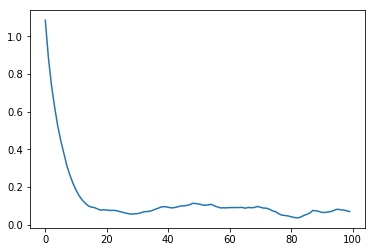

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(mi)

In [73]:
lag = 18
embed = 3
predict = 12
X,y = E.embed_vectors_1d(lag,embed,predict)

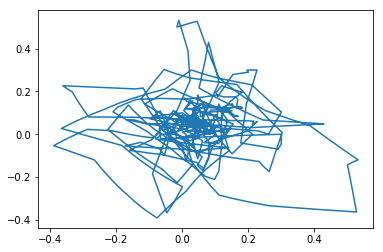

In [74]:
plt.plot(X[:,0], X[:,1])

In [75]:
#split it into training and testing sets
train_len = int(.75*len(X))
Xtrain = X[0:train_len]
ytrain = y[0:train_len]
Xtest = X[train_len:]
ytest = y[train_len:]

weights = 'distance' #use a distance weighting for the near neighbors
M = edm.Regression(weights) # initiate the nonlinear forecasting class

In [76]:
M.fit(Xtrain, ytrain) #fit the data (rebuilding the attractor)

nn_list = [10, 50, 100]
ypred = M.predict(Xtest,nn_list)

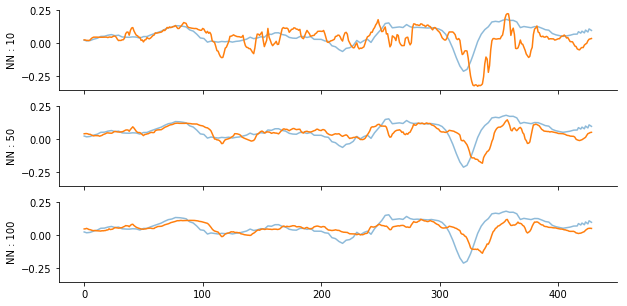

In [77]:
fig,axes = plt.subplots(3,figsize=(10,5),sharex=True,sharey=True)
ax = axes.ravel()

ax[0].plot(ytest[:,predict-1],alpha=.5)
ax[0].plot(ypred[0][:,predict-1])
ax[0].set_ylabel('NN : ' + str(nn_list[0]))

ax[1].plot(ytest[:,predict-1],alpha=.5)
ax[1].plot(ypred[1][:,predict-1])
ax[1].set_ylabel('NN : ' + str(nn_list[1]))

ax[2].plot(ytest[:,predict-1],alpha=.5)
ax[2].plot(ypred[2][:,predict-1])
ax[2].set_ylabel('NN : ' + str(nn_list[2]))

sns.despine()

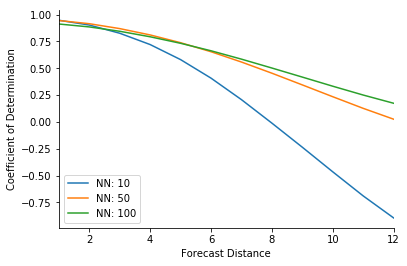

In [78]:
scores = M.score(ytest) #score

fig,ax = plt.subplots()

for i in range(3):
    label = 'NN: ' + str(nn_list[i])
    ax.plot(range(1,predict + 1),scores[i],label=label)

plt.legend(loc='lower left')
ax.set_ylabel('Coefficient of Determination')
ax.set_xlabel('Forecast Distance')
ax.set_xlim(1,predict)
sns.despine()